In [2]:
# =============================================
# NUTRICLASS PROJECT - FINAL ADVANCED VERSION
# =============================================


# NutriClass: Food Classification using Machine Learning

## 1. Business Objective
#The objective of this project is to classify food items into nutritional categories using Machine Learning.
#This helps diet planners, fitness apps, and health apps to recommend personalized meals.

## 2. Approach
 #Data loading & preprocessing
 #Exploratory Data Analysis (EDA)
 #Apply Logistic Regression, Random Forest, and KNN
 #Compare models (Accuracy, F1-score)
 #Perform Hyperparameter Tuning for Random Forest & KNN
 #Evaluate best model with Confusion Matrix & ROC
 #Feature Importance Visualization
 #Provide summary & insights


# 3. IMPORT LIBRARIES
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

import warnings
warnings.filterwarnings('ignore')
    

In [3]:
# 4. LOAD DATA
# ======================
# Replace with your dataset path
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\synthetic_food_dataset_imbalanced (1).csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [4]:
# 5. DATA PREPROCESSING
# ======================
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Fill numeric NaNs with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical NaNs with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing Values After Handling:\n", df.isnull().sum())

# Define target
target_col = 'Meal_Type'  # Change if needed
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode categorical features
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


Missing Values Before Handling:
 Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

Missing Values After Handling:
 Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


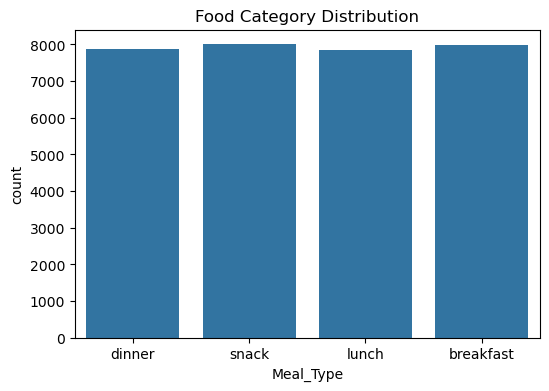

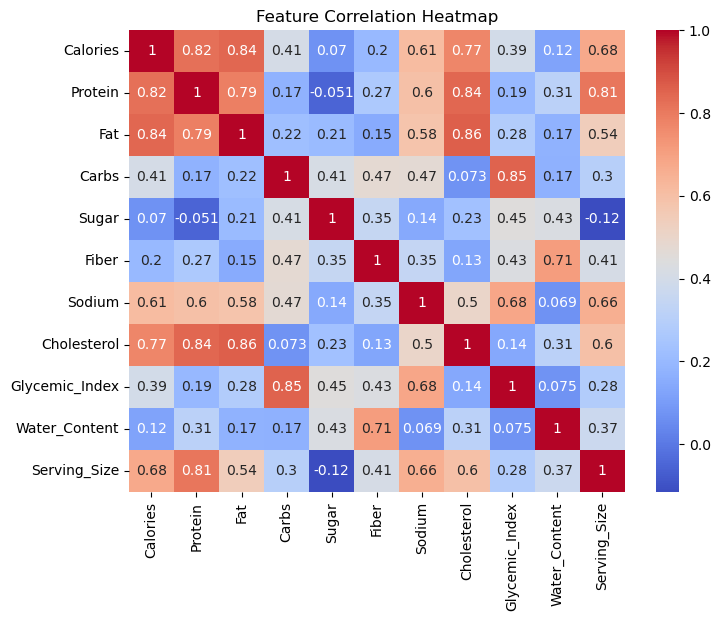

In [5]:
# 6. EDA
# ======================
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Food Category Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# 7. MODEL TRAINING & COMPARISON
# ======================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((name, acc, f1))

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1-Score'])
print("\nModel Comparison:\n", results_df)



Model Comparison:
                  Model  Accuracy  F1-Score
0  Logistic Regression  0.247003  0.244399
1        Random Forest  0.252050  0.252087
2                  KNN  0.252681  0.246786


In [7]:
# 8. HYPERPARAMETER TUNING
# ======================
# Random Forest tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1_weighted')
rf_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rf_grid.best_params_)

# KNN tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='f1_weighted')
knn_grid.fit(X_train, y_train)
print("Best KNN Params:", knn_grid.best_params_)

# Choose best tuned model
if rf_grid.best_score_ > knn_grid.best_score_:
    best_model = rf_grid.best_estimator_
    best_model_name = "Random Forest (Tuned)"
else:
    best_model = knn_grid.best_estimator_
    best_model_name = "KNN (Tuned)"

print("Best Model after Tuning:", best_model_name)


Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best KNN Params: {'n_neighbors': 9, 'weights': 'distance'}
Best Model after Tuning: KNN (Tuned)


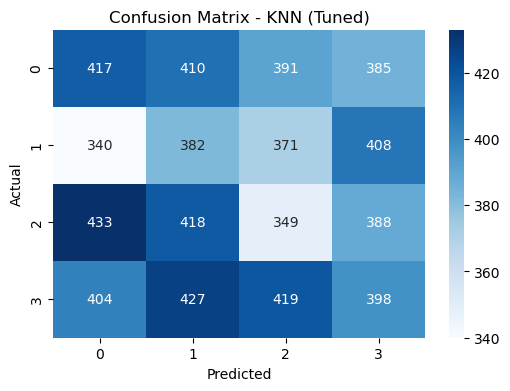

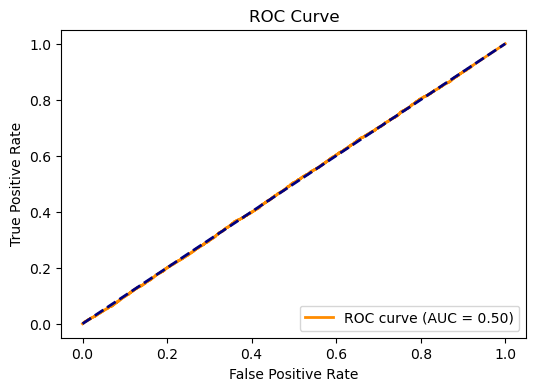


ROC AUC Score: 0.50


In [8]:
# 9. BEST MODEL EVALUATION
# ======================
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve (multi-class)
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
y_score = best_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc = roc_auc_score(y_test_bin, y_score, average='macro')

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score: {roc_auc:.2f}")

In [17]:
# 10. FEATURE IMPORTANCE (Random Forest only)
# Save feature names before scaling
feature_names = X.columns

# After choosing the best model
if "Random Forest" in best_model_name:
    # Get feature importances
    importances = pd.Series(best_model.feature_importances_, index=feature_names)
    
    # Sort and plot top 10
    top_features = importances.sort_values(ascending=False)[:10]
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_features.values, y=top_features.index, palette="Greens_r")
    plt.title("Top 10 Feature Importances (Random Forest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
else:
    print("Best model is not Random Forest, so feature importance is not available.")


Best model is not Random Forest, so feature importance is not available.


In [15]:
# 11. SUMMARY & CONCLUSION
# ======================

## Summary:
 # Models compared: Logistic Regression, Random Forest, KNN
 # After tuning, best model: {KNN}
 # ROC AUC Score: {roc_auc:0.50}

## Conclusion:
#This tuned model can be used in diet and fitness apps for accurate food category prediction.
#Future improvements: add more features, try deep learning for better performance.